In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from 

# code for extracting the data from csv file and sepersting transfer and cashout data
# reading csv files
data =  pd.read_csv('transactions_train.csv')
# print(data)
# print(data.iloc[0].values)
data1 = data[data['type'] == 'TRANSFER']
data2= data[data['type'] == 'CASH_OUT']
data3=data[data['type'] == 'CASH_IN']
data4=data[data['type'] == 'DEBIT']
data5=data[data['type'] == 'PAYMENT']
X1=data1[['amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']].values
y1=data1.iloc[:,9].values
X2=data2[['amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']].values
y2=data2.iloc[:,9].values
X3=data3[['amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']].values
y3=data3.iloc[:,9].values
X4=data4[['amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']].values
y4=data4.iloc[:,9].values
X5=data5[['amount','oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']].values
y5=data5.iloc[:,9].values
# print(data.shape)

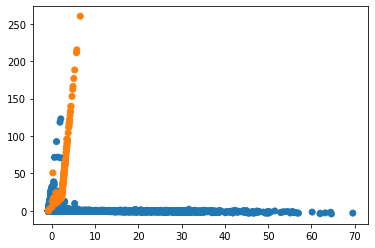

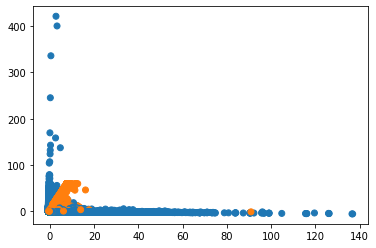

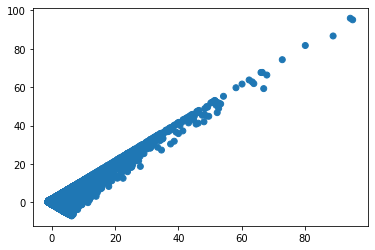

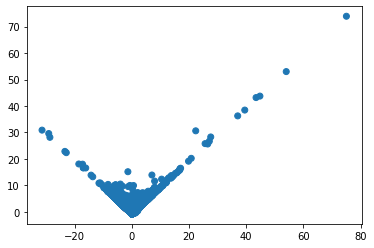

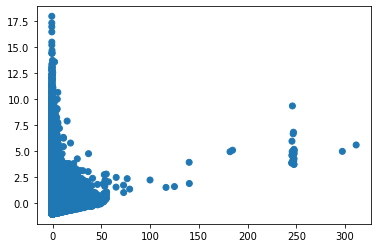

In [2]:
#pca on differnt data sets
def pca(x,y):
    scaler = preprocessing.StandardScaler()
    x = scaler.fit_transform(x)
    principal=PCA(n_components=2)
    principal=principal.fit(x)
    X_new=principal.transform(x)

    col=[]
    for j in y:
        if(j==0):
            col.append('#1f77b4')
        elif j==1:
            col.append('#ff7f0e')
    plt.scatter(X_new[:,0],X_new[:,1].real,c=col)
    plt.show()
    

pca(X1,y1)
pca(X2,y2)
pca(X3,y3)
pca(X4,y4)
pca(X5,y5)



In [2]:
# spliting the transfer and cash out data
# 70%-training set,15%-validation set,15%-testing set 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,stratify=y1 , test_size=0.30, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_test, y1_test,stratify=y1_test , test_size=0.50, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,stratify=y2 , test_size=0.30, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test, y2_test,stratify=y2_test , test_size=0.50, random_state=42)
print(y2_val.shape)

(335005,)


In [4]:
def logistic(Xtrain,Xverify,Ytrain,Yverify,W):
    LR=LogisticRegression(class_weight=W)
    LR.fit(Xtrain,Ytrain)
    y_val_pred = LR.predict(Xverify)
    precision,recall,fscore,support=score(Yverify,y_val_pred,average=None)
    return precision[1],recall[1],fscore[1]


def LinearSVM(Xtrain,Xverify,Ytrain,Yverify,cw):
    ls = LinearSVC(class_weight = cw, dual = False ,tol=1e-05,max_iter = 1000)
    ls.fit(Xtrain,Ytrain)
    y_val_pred = ls.predict(Xverify)
    precision,recall,fscore,support=score(Yverify,y_val_pred,average=None)
    return precision[1],recall[1],fscore[1]


def SVM(Xtrain,Xverify,Ytrain,Yverify,cw):
    print("hh")
    rbf = SVC(kernel='rbf',class_weight = cw,tol=1e-03,cache_size = 200)
    rbf.fit(Xtrain,Ytrain)
    y_val_pred = rbf.predict(Xverify)
    precision,recall,fscore,support=score(Yverify,y_val_pred,average=None)
    return precision[1],recall[1],fscore[1]
    
def random_forest_classifier(Xtrain,Xverify,Ytrain,Yverify,w):
    RFC=RandomForestClassifier(n_estimators=30, class_weight=w, max_depth=3)
    RFC.fit(Xtrain,Ytrain)
    y_val_pred = RFC.predict(Xverify)
    precision,recall,fscore,support=score(Yverify,y_val_pred,average=None)
    return precision[1],recall[1],fscore[1]
    
    
    


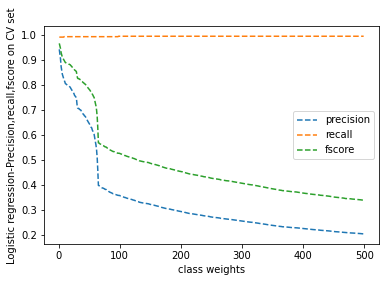

In [5]:
W={}
W[0]=1
W[1]=0
iterations=1
Wlist=[]
precisionlist=[]
recalllist=[]
fscorelist=[]
while iterations <500:
    W[1]=iterations
    Wlist.append(iterations)
    precision,recall,fscore=logistic(X1_train,X1_val,y1_train,y1_val,W)
    precisionlist.append(precision)
    recalllist.append(recall)
    fscorelist.append(fscore)
    iterations=1+iterations
    
plt.plot(Wlist,precisionlist,label = "precision",linestyle="--")
plt.plot(Wlist,recalllist,label = "recall",linestyle="--")
plt.plot(Wlist,fscorelist,label = "fscore",linestyle="--")
plt.xlabel("class weights")
plt.ylabel("Logistic regression-Precision,recall,fscore on CV set")
plt.legend()
plt.show()

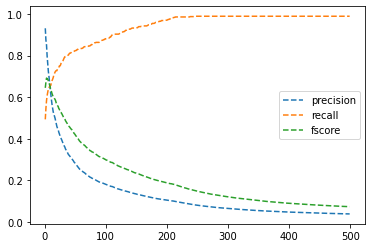

In [10]:
W={}
W[0]=1
W[1]=0
iterations=1
Wlist=[]
precisionlist=[]
recalllist=[]
fscorelist=[]
while iterations <500:
    W[1]=iterations
    Wlist.append(iterations)
    precision,recall,fscore=logistic(X2_train,X2_val,y2_train,y2_val,W)
    precisionlist.append(precision)
    recalllist.append(recall)
    fscorelist.append(fscore)
    iterations=1+iterations
    
    
plt.plot(Wlist,precisionlist,label = "precision",linestyle="--")
plt.plot(Wlist,recalllist,label = "recall",linestyle="--")
plt.plot(Wlist,fscorelist,label = "fscore",linestyle="--")
plt.legend()
plt.show()

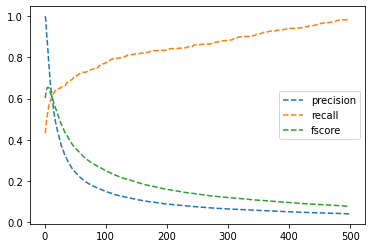

In [12]:

cw={}
cw[0]=1
cw[1]=1
iterations=1
Wlist=[]
precisionlist=[]
recalllist=[]
fscorelist=[]
while iterations <500:
    cw[1]=iterations
    Wlist.append(iterations)
    precision,recall,fscore=LinearSVM(X2_train,X2_val,y2_train,y2_val,cw)
    precisionlist.append(precision)
    recalllist.append(recall)
    fscorelist.append(fscore)
    iterations=1+iterations
    
plt.plot(Wlist,precisionlist,label = "precision",linestyle="--")
plt.plot(Wlist,recalllist,label = "recall",linestyle="--")
plt.plot(Wlist,fscorelist,label = "fscore",linestyle="--")
plt.legend()
plt.show()


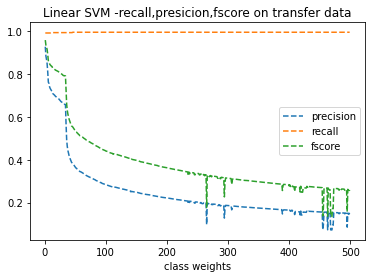

In [6]:
cw={}
cw[0]=1
cw[1]=1
iterations=1
Wlist=[]
precisionlist=[]
recalllist=[]
fscorelist=[]
while iterations <500:
    cw[1]=iterations
    Wlist.append(iterations)
    precision,recall,fscore=LinearSVM(X1_train,X1_val,y1_train,y1_val,cw)
    precisionlist.append(precision)
    recalllist.append(recall)
    fscorelist.append(fscore)
    iterations=1+iterations
    
plt.plot(Wlist,precisionlist,label = "precision",linestyle="--")
plt.plot(Wlist,recalllist,label = "recall",linestyle="--")
plt.plot(Wlist,fscorelist,label = "fscore",linestyle="--")
plt.xlabel("class weights")
plt.title("Linear SVM -recall,presicion,fscore on transfer data")
plt.legend()
plt.show()


In [7]:
cw={}
cw[0]=1
cw[1]=1
iterations=0
Wlist=[]
precisionlist=[]
recalllist=[]
fscorelist=[]
while iterations <1:
    cw[1]=iterations
    Wlist.append(iterations)
    precision,recall,fscore=SVM(X1_train,X1_val,y1_train,y1_val,cw)
    precisionlist.append(precision)
    recalllist.append(recall)
    fscorelist.append(fscore)
    iterations=1+iterations
    
    
plt.plot(Wlist,precisionlist,label = "precision",linestyle="--")
plt.plot(Wlist,recalllist,label = "recall",linestyle="--")
plt.plot(Wlist,fscorelist,label = "fscore",linestyle="--")
plt.legend()
plt.show()

In [ ]:
cw={}
cw[0]=1
cw[1]=1
iterations=0
Wlist=[]
precisionlist=[]
recalllist=[]
fscorelist=[]
while iterations <1:
    cw[1]=iterations
    Wlist.append(iterations)
    precision,recall,fscore=SVM(X2_train,X2_val,y2_train,y2_val,cw)
    precisionlist.append(precision)
    recalllist.append(recall)
    fscorelist.append(fscore)
    iterations=1+iterations
    
    
plt.plot(Wlist,precisionlist,label = "precision",linestyle="--")
plt.plot(Wlist,recalllist,label = "recall",linestyle="--")
plt.plot(Wlist,fscorelist,label = "fscore",linestyle="--")
plt.legend()
plt.show()

In [ ]:
cw={}
cw[0]=1
cw[1]=1
iterations=1
Wlist=[]
precisionlist=[]
recalllist=[]
fscorelist=[]
while iterations <500:
    cw[1]=iterations
    Wlist.append(iterations)
    precision,recall,fscore=random_forest_classifier(X1_train,X1_val,y1_train,y1_val,cw)
    precisionlist.append(precision)
    recalllist.append(recall)
    fscorelist.append(fscore)
    iterations=1+iterations
    
plt.plot(Wlist,precisionlist,label = "precision",linestyle="--")
plt.plot(Wlist,recalllist,label = "recall",linestyle="--")
plt.plot(Wlist,fscorelist,label = "fscore",linestyle="--")
plt.xlabel("class weights")
plt.title("Random forest -recall,presicion,fscore on transfer data")
plt.legend()
plt.show()


In [ ]:
cw={}
cw[0]=1
cw[1]=1
iterations=1
Wlist=[]
precisionlist=[]
recalllist=[]
fscorelist=[]
while iterations <500:
    cw[1]=iterations
    Wlist.append(iterations)
    precision,recall,fscore=random_forest_classifier(X2_train,X2_val,y2_train,y2_val,cw)
    precisionlist.append(precision)
    recalllist.append(recall)
    fscorelist.append(fscore)
    iterations=1+iterations
    
plt.plot(Wlist,precisionlist,label = "precision",linestyle="--")
plt.plot(Wlist,recalllist,label = "recall",linestyle="--")
plt.plot(Wlist,fscorelist,label = "fscore",linestyle="--")
plt.xlabel("class weights")
plt.title("Random forest -recall,presicion,fscore on cash out data")
plt.legend()
plt.show()

In [ ]:
def PRCurve(Xtrain,Xverify,Ytrain,Yverify,cw,W,w):
    ls = LinearSVC(class_weight = cw, dual = False ,tol=1e-05,max_iter = 1000)
    ls.fit(Xtrain,Ytrain)
    y_val_pred = ls.decision_function(Xverify)
#     print(y_val_pred.shape)
    precision, recall, thresholds = precision_recall_curve(Yverify, y_val_pred,pos_label = 1,sample_weight=None)
#     print(thresholds)
    area = auc(recall,precision)
    area = round(area,4)
    print('Logistic Regression - Area under PRC' , area)
    plt.plot(recall, precision, linestyle='--' , color = 'r',label = 'Logistic Regression - AUPRC - '  + str(area))
    
    LR=LogisticRegression(class_weight=W)
    LR.fit(Xtrain,Ytrain)
    y_val_pred = LR.decision_function(Xverify)
    pre_svm , rec_svm, thresh_svm = precision_recall_curve(Yverify, y_val_pred,pos_label = 1,sample_weight=None)
    area = auc(rec_svm, pre_svm)
    area = round(area,4)
    print('Linear SVM - Area under PRC' , area)
    plt.plot(rec_svm, pre_svm, linestyle='--' , color = 'b',label = 'Linear SVM - AUPRC - '  + str(area))
    
    rbf = SVC(kernel='rbf',class_weight = w,tol=1e-03,cache_size = 200)
    rbf.fit(Xtrain,Ytrain)
    y_val_pred = rbf.decision_function(Xverify)
    pre_kernel_svm , rec_kernel_svm, thresh_kernel_svm = precision_recall_curve(Yverify, y_val_pred,pos_label = 1 )
    area = auc(rec_kernel_svm, pre_kernel_svm)
    area = round(area,4)

    print('RBF Precision ' , pre_kernel_svm)
    print('RBF Recall ' , rec_kernel_svm)
   
    print('SVM with RBF kernel - Area under PRC' , area)
    plt.plot(rec_kernel_svm, pre_kernel_svm, linestyle='--' , color = 'g',label = 'SVM RBF kernel - AUPRC - '  + str(area))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
     
cw={}

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
def AUPRC(Xtrain,Xverify,Ytrain,Yverify,cw,algorithm):
    if algorithm=="linear":
        ls = LinearSVC(class_weight = cw, dual = False ,tol=1e-05,max_iter = 1000)
        ls.fit(Xtrain,Ytrain)
        y_val_pred = ls.predict(Xverify)
        precision,recall,fscore,support=score(Yverify,y_val_pred,average=None)
        y_val_pred = ls.decision_function(Xverify)
    #     print(y_val_pred.shape)
        precision, recall, thresholds = precision_recall_curve(Yverify, y_val_pred,pos_label = 1,sample_weight=None)
    #     print(thresholds)
        area = auc(recall,precision)
        area = round(area,4)
        return precision[1],recall[1],fscore[1],area
    elif algorithm=="LR":
        LR=LogisticRegression(class_weight=cw)
        LR.fit(Xtrain,Ytrain)
        y_val_pred = LR.predict(Xverify)
        precision,recall,fscore,support=score(Yverify,y_val_pred,average=None)
        y_val_pred = LR.decision_function(Xverify)
        pre_svm , rec_svm, thresh_svm = precision_recall_curve(Yverify, y_val_pred,pos_label = 1,sample_weight=None)
        area = auc(rec_svm, pre_svm)
        area = round(area,4)
        return precision[1],recall[1],fscore[1],area
    elif algorithm=="rbf":
        rbf = SVC(kernel='rbf',class_weight = cw,tol=1e-03,cache_size = 200)
        rbf.fit(Xtrain,Ytrain)
        y_val_pred = rbf.predict(Xverify)
        precision,recall,fscore,support=score(Yverify,y_val_pred,average=None)
        y_val_pred = rbf.decision_function(Xverify)
        pre_kernel_svm , rec_kernel_svm, thresh_kernel_svm = precision_recall_curve(Yverify, y_val_pred,pos_label = 1 )
        area = auc(rec_kernel_svm, pre_kernel_svm)
        area = round(area,4)
        return precision[1],recall[1],fscore[1],area
    elif algorithm=="DT":
        RFC=RandomForestClassifier(n_estimators=30, class_weight=cw, max_depth=3)
        RFC.fit(Xtrain,Ytrain)
        y_val_pred = RFC.predict(Xverify)
        precision,recall,fscore,support=score(Yverify,y_val_pred,average=None)
#         y_val_pred = RFC.decision_function(Xverify)
        pre_kernel_svm , rec_kernel_svm, thresh_kernel_svm = precision_recall_curve(Yverify, y_val_pred,pos_label = 1 )
        area = auc(rec_kernel_svm, pre_kernel_svm)
        area = round(area,4)
        return precision[1],recall[1],fscore[1],area
    elif algorithm=="GD":
        print("kk")
        LR=GradientBoostingClassifier()
        sample_weights = np.zeros(len(Ytrain))
        sample_weights[Ytrain == 0] = cw[0]
        sample_weights[Ytrain == 1] = cw[1]
        LR.fit(Xtrain,Ytrain,sample_weight=sample_weights)

        y_val_pred = LR.predict(Xverify)
        precision,recall,fscore,support=score(Yverify,y_val_pred,average=None)
#         y_val_pred = RFC.decision_function(Xverify)
        pre_kernel_svm , rec_kernel_svm, thresh_kernel_svm = precision_recall_curve(Yverify, y_val_pred,pos_label = 1 )
        area = auc(rec_kernel_svm, pre_kernel_svm)
        area = round(area,4)
        return precision[1],recall[1],fscore[1],area
        

        
    

    

In [4]:
# for tabulating precision ,recall ,fscore
def table(data,algorithm,Xtrain,Xverify,Ytrain,Yverify,w):
    
    dummy=[]
    precision,recall,fscore,area=AUPRC(Xtrain,Xverify,Ytrain,Yverify,w,algorithm)
    dummy.append(algorithm)
    dummy.append(precision)
    dummy.append(recall)
    dummy.append(fscore)
    dummy.append(area)
    data.append(dummy)
    print("kk")
    
# data=[]
# c1={}
# c1[1]=70
# c1[0]=1
# c2={}
# c2[1]=39
# c2[0]=1
# c3={}
# c3[1]=16
# c3[0]=1

# head = ["Algorithm", "precision","recall","fscore","AUPRC"]
# table(data,"LR",X1_train,X1_val,y1_train,y1_val,c1)
# table(data,"linear",X1_train,X1_val,y1_train,y1_val,c2)
# table(data,"rbf",X1_train,X1_val,y1_train,y1_val,c3)
# print(tabulate(data, headers=head, tablefmt="grid"))

        


In [7]:
data=[]
c1={}
c1[1]=70
c1[0]=1
c2={}
c2[1]=39
c2[0]=1
c3={}
c3[1]=16
c3[0]=1

head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"LR",X1_train,X1_test,y1_train,y1_test,c1)
table(data,"linear",X1_train,X1_test,y1_train,y1_test,c2)
table(data,"rbf",X1_train,X1_test,y1_train,y1_test,c3)
print(tabulate(data, headers=head, tablefmt="grid"))


data=[]
c1={}
c1[1]=70
c1[0]=1
c2={}
c2[1]=39
c2[0]=1
c3={}
c3[1]=16
c3[0]=1

head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"LR",X1_train,X1_train,y1_train,y1_train,c1)
table(data,"linear",X1_train,X1_train,y1_train,y1_train,c2)
table(data,"rbf",X1_train,X1_train,y1_train,y1_train,c3)
print(tabulate(data, headers=head, tablefmt="grid"))

kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   fscore |   AUPRC |
+=============+=============+==========+==========+=========+
| LR          |   0.405634  | 0.998267 | 0.576865 |  0.9216 |
+-------------+-------------+----------+----------+---------+
| linear      |   0.0645089 | 0.998267 | 0.611465 |  0.9064 |
+-------------+-------------+----------+----------+---------+
| rbf         |   0.387949  | 0.993068 | 0.557936 |  0.9867 |
+-------------+-------------+----------+----------+---------+
kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   fscore |   AUPRC |
+=============+=============+==========+==========+=========+
| LR          |  0.392512   | 0.996288 | 0.563156 |  0.9296 |
+-------------+-------------+----------+----------+---------+
| linear      |  0.00977911 | 0.999629 | 0.599576 |  0.9159 |
+-------------+-------------+----------+----------+-

In [8]:
data=[]
c1={}
c1[1]=145
c1[0]=1
c2={}
c2[1]=132
c2[0]=1
c3={}
c3[1]=128
c3[0]=1

head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"LR",X1_train,X1_val,y1_train,y1_val,c1)
table(data,"linear",X1_train,X1_val,y1_train,y1_val,c2)
table(data,"rbf",X1_train,X1_val,y1_train,y1_val,c3)
print(tabulate(data, headers=head, tablefmt="grid"))

data=[]

head = ["Algorithm", "precision","recall","fscore","AUPRC"]
head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"LR",X1_train,X1_test,y1_train,y1_test,c1)
table(data,"linear",X1_train,X1_test,y1_train,y1_test,c2)
table(data,"rbf",X1_train,X1_test,y1_train,y1_test,c3)
print(tabulate(data, headers=head, tablefmt="grid"))


data=[]
head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"LR",X1_train,X1_train,y1_train,y1_train,c1)
table(data,"linear",X1_train,X1_train,y1_train,y1_train,c2)
table(data,"rbf",X1_train,X1_train,y1_train,y1_train,c3)
print(tabulate(data, headers=head, tablefmt="grid"))


kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   fscore |   AUPRC |
+=============+=============+==========+==========+=========+
| LR          |   0.32541   |  0.99481 | 0.490405 |  0.8832 |
+-------------+-------------+----------+----------+---------+
| linear      |   0.0105438 |  0.99827 | 0.413075 |  0.8291 |
+-------------+-------------+----------+----------+---------+
| rbf         |   0.258326  |  0.99308 | 0.41     |  0.9912 |
+-------------+-------------+----------+----------+---------+
kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   fscore |   AUPRC |
+=============+=============+==========+==========+=========+
| LR          |   0.336056  | 0.998267 | 0.502837 |  0.8733 |
+-------------+-------------+----------+----------+---------+
| linear      |   0.0467153 | 0.998267 | 0.420438 |  0.8204 |
+-------------+-------------+----------+----------+-

In [22]:
c3={}
c3[1]=80
c3[0]=1
c4={}
c4[1]=250
c4[0]=1
data=[]
head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"DT",X1_train,X1_train,y1_train,y1_train,c3)
table(data,"GD",X1_train,X1_train,y1_train,y1_train,c4)
print(tabulate(data, headers=head, tablefmt="grid"))

kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   fscore |   AUPRC |
+=============+=============+==========+==========+=========+
| DT          |    0.974508 | 0.993318 | 0.983824 |  0.9839 |
+-------------+-------------+----------+----------+---------+
| GD          |    0.981421 | 1        | 0.990623 |  0.9907 |
+-------------+-------------+----------+----------+---------+


In [23]:
data=[]
head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"DT",X1_train,X1_val,y1_train,y1_val,c3)
table(data,"GD",X1_train,X1_val,y1_train,y1_val,c4)
print(tabulate(data, headers=head, tablefmt="grid"))
data=[]
head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"DT",X1_train,X1_test,y1_train,y1_test,c3)
table(data,"GD",X1_train,X1_test,y1_train,y1_test,c4)
print(tabulate(data, headers=head, tablefmt="grid"))

kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   fscore |   AUPRC |
+=============+=============+==========+==========+=========+
| DT          |    0.971235 |  0.99308 | 0.982036 |  0.9822 |
+-------------+-------------+----------+----------+---------+
| GD          |    0.977853 |  0.99308 | 0.985408 |  0.9855 |
+-------------+-------------+----------+----------+---------+
kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   fscore |   AUPRC |
+=============+=============+==========+==========+=========+
| DT          |    0.969492 | 0.991334 | 0.980291 |  0.9804 |
+-------------+-------------+----------+----------+---------+
| GD          |    0.97615  | 0.993068 | 0.984536 |  0.9846 |
+-------------+-------------+----------+----------+---------+


In [25]:
c3={}
c3[1]=65
c3[0]=1
c4={}
c4[1]=150
c4[0]=1
data=[]
head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"DT",X2_train,X2_train,y2_train,y2_train,c3)
table(data,"GD",X2_train,X2_train,y2_train,y2_train,c4)
print(tabulate(data, headers=head, tablefmt="grid"))
data=[]
head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"DT",X2_train,X2_val,y2_train,y2_val,c3)
table(data,"GD",X2_train,X2_val,y2_train,y2_val,c4)
print(tabulate(data, headers=head, tablefmt="grid"))
data=[]
head = ["Algorithm", "precision","recall","fscore","AUPRC"]
table(data,"DT",X2_train,X2_test,y2_train,y2_test,c3)
table(data,"GD",X2_train,X2_test,y2_train,y2_test,c4)
print(tabulate(data, headers=head, tablefmt="grid"))

kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   fscore |   AUPRC |
+=============+=============+==========+==========+=========+
| DT          |   0.824639  | 0.48449  | 0.610375 |  0.655  |
+-------------+-------------+----------+----------+---------+
| GD          |   0.0965359 | 0.994092 | 0.175982 |  0.5453 |
+-------------+-------------+----------+----------+---------+
kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   fscore |   AUPRC |
+=============+=============+==========+==========+=========+
| DT          |   0.692124  | 0.5      | 0.580581 |  0.5965 |
+-------------+-------------+----------+----------+---------+
| GD          |   0.0932051 | 0.986207 | 0.170314 |  0.5397 |
+-------------+-------------+----------+----------+---------+
kk
kk
kk
+-------------+-------------+----------+----------+---------+
| Algorithm   |   precision |   recall |   